In [1]:
import h5py
import numpy as np
import pypostpiv as p3
import pypostpiv.utilities as p3u
import matplotlib.pyplot as plt
%matplotlib inline

fpath = r'D:/Experiment_201705/STAT_HD4_60Deg_-1X5/RE3000_F0015-A1/SubOverTimeMin_sL=all/Div/SeqPIV_MP(4x24x24_75%ov)/'
spath = r'E:/UWaterloo_PhD/5a. Python/P3TEST/'

## Suppress Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Covert DaVis Format to HDF5

In [3]:
p3u.convert_2d_2c_vc7(fpath, spath+'TESTTEST.hdf5')

# Create 2D 1C PIV Double Camera Project

In [4]:
TP1 = p3.piv.Project2D2C(spath+'TESTTEST.hdf5')
TP1.list_data()

cam_0
----grid_size
--------dx
--------dy
----velocity
--------u
--------v
--------x
--------y


In [5]:
dir(TP1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'data',
 'get_grid_size',
 'get_turb_covar',
 'get_turb_ke',
 'get_turb_rms',
 'get_vel_mag',
 'get_vel_mag_mean',
 'get_vel_mean',
 'get_velocity',
 'list_data']

In [6]:
dx0, dy0 = TP1.get_grid_size()
x0, y0, ui, vi = TP1.get_velocity()
x0, y0, u, v = TP1.get_vel_mean()
x0, y0, V = TP1.get_vel_mag_mean()
x0, y0, urms, vrms = TP1.get_turb_rms()
x0, y0, TKE = TP1.get_turb_ke()
x0, y0, uv = TP1.get_turb_covar()
TP1.list_data()

cam_0
----grid_size
--------dx
--------dy
----velocity
--------u
--------v
--------x
--------y
----vel_mean
--------x
--------y
--------u
--------v
----vel_mag_mean
--------x
--------y
--------U
----vel_rms
--------x
--------y
--------u
--------v
----turb_ke
--------x
--------y
--------ke
----turb_covar
--------x
--------y
--------uv


In [7]:
Deg = 60
Re = 3000

fcpath = ('E:/UWaterloo_PhD/4.Experiments/2. Data/201705_PIV campaign/PostProc/STAT_HD4_'+str(Deg)+'Deg/')
fcstat=  h5py.File(fcpath+'HD4_RE'+str(Re)+'_'+str(Deg)+'Deg_-1X5.hdf5', 'r')

uc = fcstat['v'][:,:,0:300]; vc = fcstat['u'][:,:, 0:300]
xc = fcstat['y'][:,:].T/1000; yc = fcstat['x'][:,:].T/1000

fcstat.close()

ucavg = np.nanmean(uc, axis = 2).T
vcavg = np.nanmean(vc, axis = 2).T
Vcavg = np.nanmean(np.sqrt(uc**2+vc**2), axis = 2).T

ucrms = np.nanstd(uc, axis = 2).T
vcrms = np.nanstd(vc, axis = 2).T

tkec = (ucrms**2 + vcrms**2)

uvc =( np.nanmean(((uc-ucavg.T[:,:,np.newaxis])*(vc-vcavg.T[:,:,np.newaxis])), axis = 2) ).T

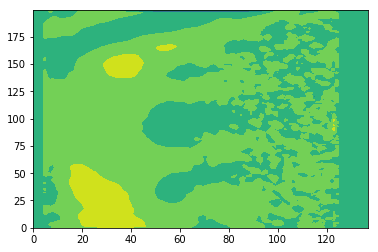

In [8]:
plt.contourf(uvc)

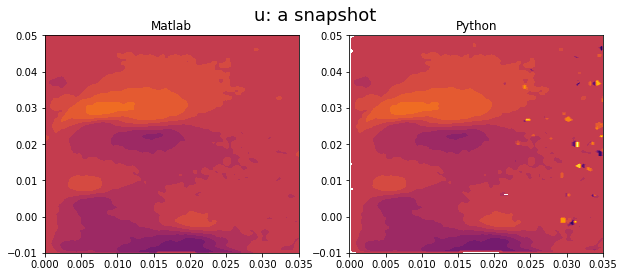

In [9]:
fig, axs = plt.subplots(1,2, figsize  = (10, 4))

cmax = np.nanmax([np.nanmax(uc[:,:,0]), np.nanmax(ui[:,:,0])])
cmin = np.nanmin([np.nanmin(uc[:,:,0]), np.nanmin(ui[:,:,0])])
ctf0 = axs[0].contourf(xc, yc, uc[:,:,0].T, cmap = 'inferno', levels = np.linspace(cmin, cmax, 21))
ctf1 = axs[1].contourf(x0, y0, ui[:,:,0], cmap = 'inferno', levels = np.linspace(cmin, cmax, 21))

plt.suptitle('u: a snapshot', fontsize= 18)

axs[0].set_title('Matlab')
axs[1].set_title('Python')
for ax in axs[:]:

    ax.set_xlim(0, 0.035)
    ax.set_ylim(-0.01, 0.05)

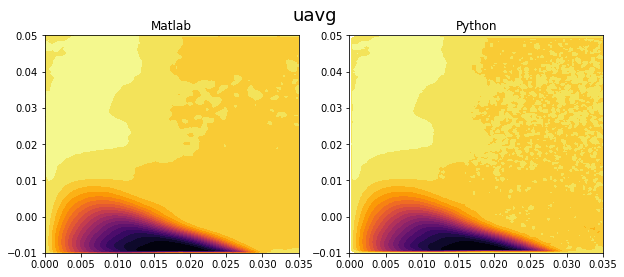

In [169]:
fig, axs = plt.subplots(1,2, figsize  = (10, 4))

cmax = np.nanmax([np.nanmax(ucavg), np.nanmax(u)])
cmin = np.nanmin([np.nanmin(ucavg), np.nanmin(u)])

plt.suptitle('uavg', fontsize= 18)

ctf0 = axs[0].contourf(xc, yc, ucavg, cmap = 'inferno', levels = np.linspace(cmin, cmax, 21))
ctf1 = axs[1].contourf(x0, y0, u, cmap = 'inferno', levels = np.linspace(cmin, cmax, 21))
axs[0].set_title('Matlab')
axs[1].set_title('Python')
for ax in axs[:]:

    ax.set_xlim(0, 0.035)
    ax.set_ylim(-0.01, 0.05)
    


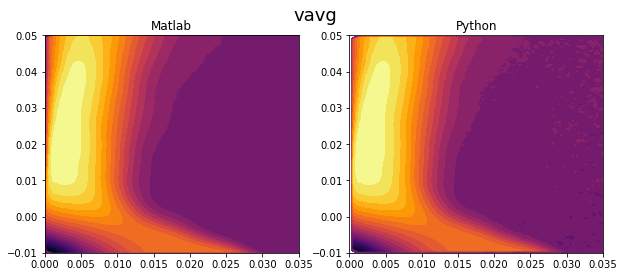

In [167]:
fig, axs = plt.subplots(1,2, figsize  = (10, 4))

cmax = np.nanmax([np.nanmax(vcavg), np.nanmax(v)])
cmin = np.nanmin([np.nanmin(vcavg), np.nanmin(v)])

plt.suptitle('vavg', fontsize= 18)

ctf0 = axs[0].contourf(xc, yc, vcavg, cmap = 'inferno', levels = np.linspace(cmin, cmax, 21))
ctf1 = axs[1].contourf(x0, y0, v, cmap = 'inferno', levels = np.linspace(cmin, cmax, 21))
axs[0].set_title('Matlab')
axs[1].set_title('Python')
for ax in axs[:]:

    ax.set_xlim(0, 0.035)
    ax.set_ylim(-0.01, 0.05)
    


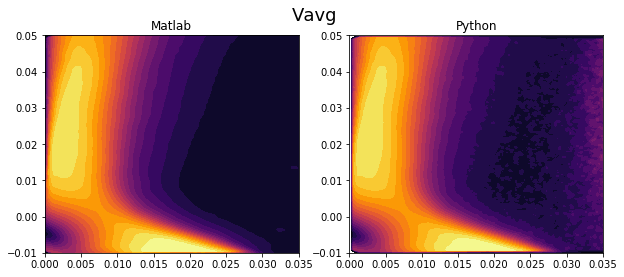

In [168]:
fig, axs = plt.subplots(1,2, figsize  = (10, 4))

cmax = np.nanmax([np.nanmax(Vcavg), np.nanmax(V)])
cmin = np.nanmin([np.nanmin(Vcavg), np.nanmin(V)])

plt.suptitle('Vavg', fontsize= 18)

ctf0 = axs[0].contourf(xc, yc, Vcavg, cmap = 'inferno', levels = np.linspace(cmin, cmax, 21))
ctf1 = axs[1].contourf(x0, y0, V, cmap = 'inferno', levels = np.linspace(cmin, cmax, 21))
axs[0].set_title('Matlab')
axs[1].set_title('Python')
for ax in axs[:]:

    ax.set_xlim(0, 0.035)
    ax.set_ylim(-0.01, 0.05)


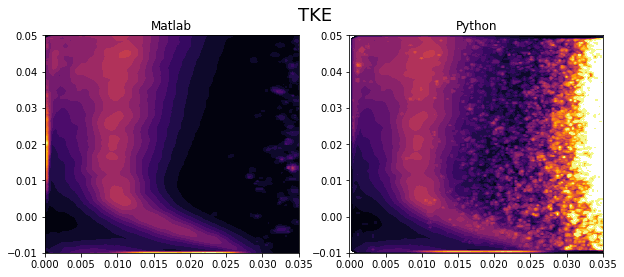

In [165]:
fig, axs = plt.subplots(1,2, figsize  = (10, 4))

cmax = np.nanmax([ np.nanmax(tkec)])
cmin = np.nanmin([np.nanmin(TKE), np.nanmin(tkec)])

plt.suptitle('TKE', fontsize= 18)

ctf0 = axs[0].contourf(xc, yc, tkec, cmap = 'inferno', levels = np.linspace(cmin, cmax, 21))
ctf1 = axs[1].contourf(x0, y0, TKE, cmap = 'inferno', levels = np.linspace(cmin, cmax, 21))
axs[0].set_title('Matlab')
axs[1].set_title('Python')
for ax in axs[:]:

    ax.set_xlim(0, 0.035)
    ax.set_ylim(-0.01, 0.05)

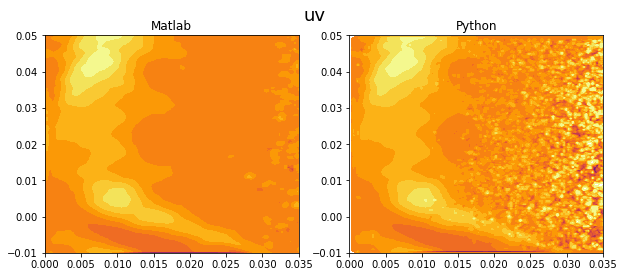

In [166]:
fig, axs = plt.subplots(1,2, figsize  = (10, 4))

cmax = np.nanmax([ np.nanmax(uvc)])
cmin = np.nanmin([np.nanmin(uv), np.nanmin(uvc)])

plt.suptitle('uv', fontsize= 18)

ctf0 = axs[0].contourf(xc, yc, uvc, cmap = 'inferno', levels = np.linspace(cmin, cmax, 21))
ctf1 = axs[1].contourf(x0, y0, uv, cmap = 'inferno', levels = np.linspace(cmin, cmax, 21))
axs[0].set_title('Matlab')
axs[1].set_title('Python')
for ax in axs[:]:

    ax.set_xlim(0, 0.035)
    ax.set_ylim(-0.01, 0.05)

In [ ]:
fig, axs = plt.subplots(1,2, figsize  = (10, 4))

cmax = np.nanmax([np.nanmax(Vcavg), np.nanmax(V)])
cmin = np.nanmin([np.nanmin(Vcavg), np.nanmin(V)])

ctf0 = axs[0].contourf(xc, yc, Vcavg, cmap = 'inferno', levels = np.linspace(cmin, cmax, 21))

ctf1 = axs[1].contourf(x0, y0, V, cmap = 'inferno', levels = np.linspace(cmin, cmax, 21))

for ax in axs[:]:

    ax.set_xlim(0, 0.035)
    ax.set_ylim(-0.01, 0.05)


In [119]:
col1 = np.argmin(np.abs(x0[0,:]-xc.min()))
col2 = np.argmin(np.abs(x0[0,:]-xc.max())) +1
row1 = np.argmin(np.abs(y0[:,0]-yc.min()))
row2 = np.argmin(np.abs(y0[:,0]-yc.max())) +1
print(col1, col2, row1, row2)

19 157 0 200


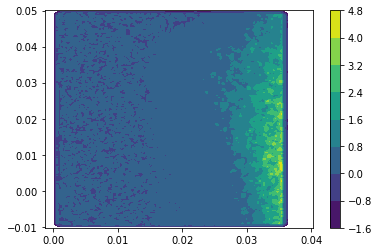

In [130]:
ctf = plt.contourf(xc,yc, resV/np.flipud(Vcavg))
plt.colorbar(ctf)

In [124]:
np.nanmax(resV)

1.7549496932221944

In [125]:
np.nanmin(resV)

-4.3527456419098955